<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

In [ ]:
dataset=pd.read_csv('/content/Rainfall.csv')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
dataset['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
dataset.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
dataset.columns=dataset.columns.str.strip()
dataset.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
dataset=dataset.drop(columns=['day'])


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      365 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [ ]:
dataset.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [ ]:
dataset['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
dataset['winddirection']=dataset['winddirection'].fillna(dataset['winddirection'].mode()[0])
dataset['windspeed']=dataset['windspeed'].fillna(dataset['windspeed'].median())
dataset.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [ ]:
dataset['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dataset['rainfall']=dataset['rainfall'].map({'yes':1,'no':0})
dataset.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
sns.set(style='whitegrid')

In [ ]:
dataset.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [ ]:
dataset.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

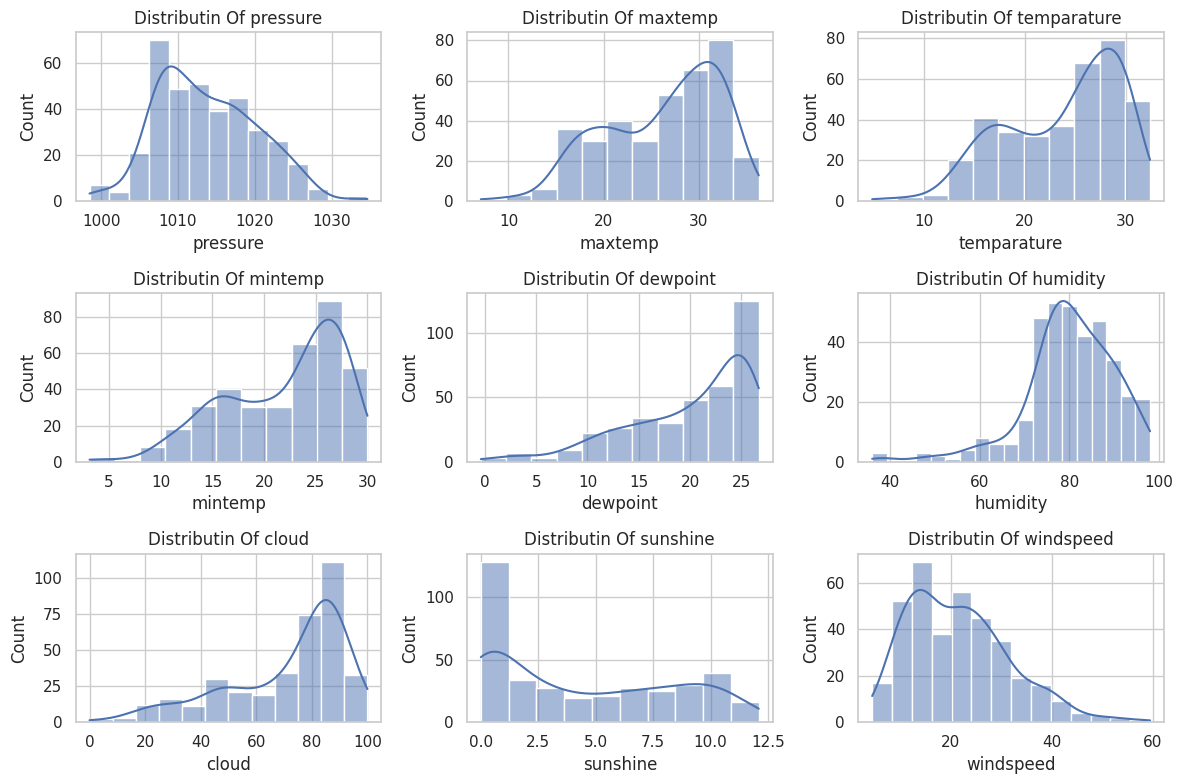

In [ ]:
plt.figure(figsize=(12,8))

for i,column in enumerate(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(dataset[column],kde=True)
  plt.title(f'Distributin Of {column}')
plt.tight_layout()
plt.show()

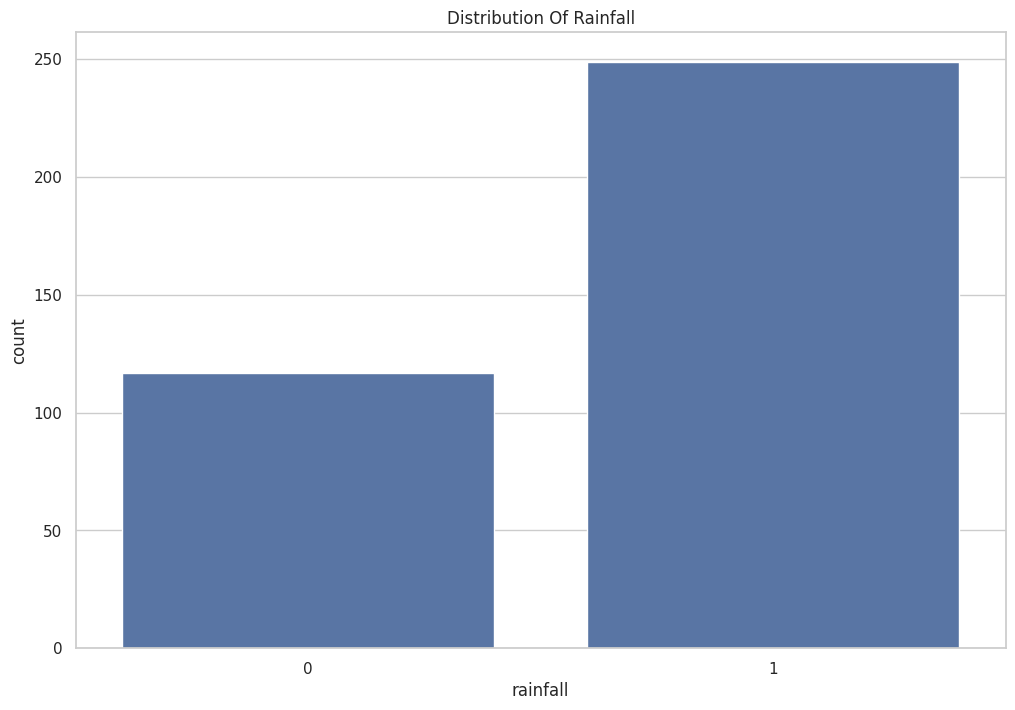

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='rainfall',data=dataset)
plt.title('Distribution Of Rainfall')
plt.show()

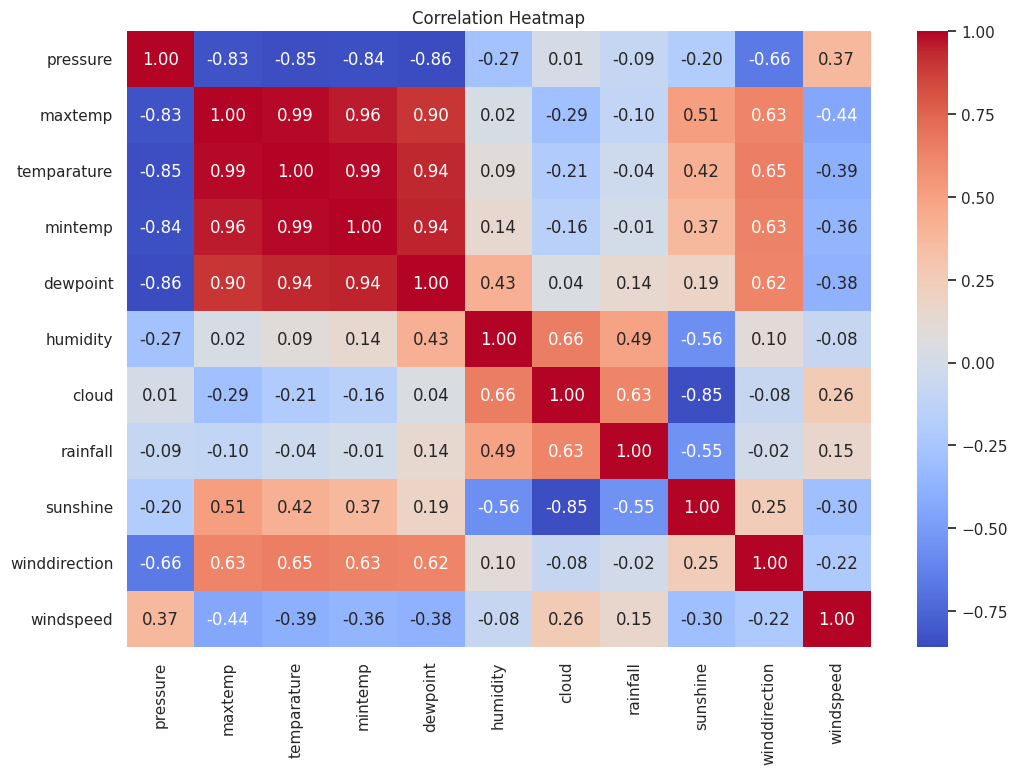

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

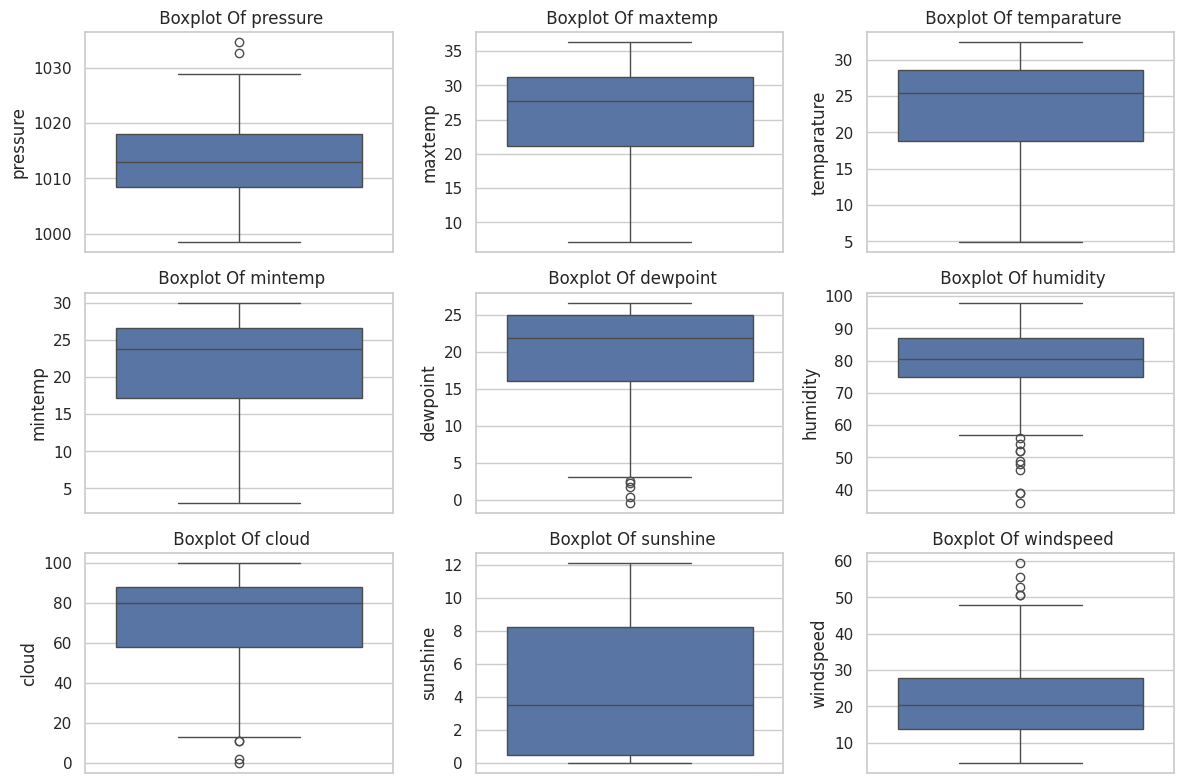

In [ ]:
plt.figure(figsize=(12,8))
for i,column in enumerate(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(dataset[column])
  plt.title(f' Boxplot Of {column}')
plt.tight_layout()
plt.show()

In [ ]:
dataset=dataset.drop(columns=['maxtemp','temparature','mintemp'])
dataset.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
dataset['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [ ]:
majority=dataset[dataset['rainfall']==1]
minority=dataset[dataset['rainfall']==0]
print(majority.shape)
print(minority.shape)

(249, 8)
(117, 8)


In [ ]:
majority_sample=resample(majority,replace=False,n_samples=len(minority),random_state=42)
majority_sample.shape

(117, 8)

In [ ]:
data_downsampled=pd.concat([majority_sample,minority])
data_downsampled.shape

(234, 8)

In [ ]:
data_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [ ]:
data_downsampled=data_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)
data_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
data_downsampled['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
X=data_downsampled.drop(columns=['rainfall'])
Y=data_downsampled['rainfall']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier(random_state=42)
paraf_grid_rf={
    'n_estimators':[50,100,200],
    'max_features':['sqrt','log2'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
grid=GridSearchCV(estimator=model,param_grid=paraf_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_model=grid.best_estimator_
print('Best Parameter For Random Forest:', best_model)

Best Parameter For Random Forest: RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)


In [ ]:
cv_scores=cross_val_score(best_model,X_train,Y_train,cv=5)
print('Cross Validation Score: ',cv_scores)
print('Mean Cross Validation Score: ',np.mean(cv_scores))

Cross Validation Score:  [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean Cross Validation Score:  0.818918918918919


In [ ]:
Y_pred=best_model.predict(X_test)
print('Test Accurasy: ' ,accuracy_score(Y_pred,Y_test))
print('Test Confusion Matrix: ',confusion_matrix(Y_test,Y_pred))
print('Classification Report: ',classification_report(Y_test,Y_pred))

Test Accurasy:  0.7446808510638298
Test Confusion Matrix:  [[17  7]
 [ 5 18]]
Classification Report:                precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [ ]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [ ]:
prediction=best_model.predict(input_df)
print(prediction)

[1]


In [ ]:
prediction[0]

1

In [ ]:
prediction=best_model.predict(input_df)
print('Prediction Resulst: ','Rainfall' if prediction[0]==1 else 'No Rainfall')

Prediction Resulst:  Rainfall


In [ ]:
model_data={'model':best_model,'features_names':X.columns.tolist()}
with open('rainfall_prediction_model.pkl','wb') as file:
  pickle.dump(model_data,file)

In [ ]:
import pickle
import pandas as pd
with open('rainfall_prediction_model.pkl','rb') as file:
  model_data=model_data['features_names']

In [ ]:
import pickle
import pandas as pd
# Load the model data from the pickle file
with open('rainfall_prediction_model.pkl','rb') as file:
  loaded_model_data = pickle.load(file) # Assign the loaded data to a new variable
# Access the model and feature names from the loaded dictionary
model = loaded_model_data["model"]
feature_names = loaded_model_data["features_names"]

In [ ]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

# Reshape input_data to a 2D array with one row and multiple columns
input_data_reshaped = np.array(input_data).reshape(1, -1)

# Now use the reshaped data for prediction
prediction = best_model.predict(input_data_reshaped)
print('Prediction Result: ','Rainfall' if prediction[0]==1 else 'No Rainfall')

Prediction Result:  Rainfall


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
